In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import pylab

In [26]:
#import data
df = pd.read_csv('MLF_GP2_EconCycle.csv')
#dropping the atribute date because it's irrelevant
df = df.drop(['Date'],axis=1)
#summary of data
print("Size of data " + str(len(df)) + " x " + str(len(df.columns)))
print(df.head())

Size of data 223 x 18
   T1Y Index  T2Y Index  T3Y Index  T5Y Index  T7Y Index  T10Y Index  CP1M  \
0      10.41       9.86       9.50       9.20       9.14        9.10  9.75   
1      10.24       9.72       9.29       9.13       9.11        9.10  9.74   
2      10.25       9.79       9.38       9.20       9.15        9.12  9.72   
3      10.12       9.78       9.43       9.25       9.21        9.18  9.86   
4      10.12       9.78       9.42       9.24       9.23        9.25  9.77   

   CP3M   CP6M  CP1M_T1Y  CP3M_T1Y  CP6M_T1Y  Ratio T10Y/T1Y Index  \
0  9.95  10.01  0.936599  0.955812  0.961575              0.874159   
1  9.90   9.96  0.951172  0.966797  0.972656              0.888672   
2  9.85   9.87  0.948293  0.960976  0.962927              0.889756   
3  9.95   9.98  0.974308  0.983202  0.986166              0.907115   
4  9.76   9.71  0.965415  0.964427  0.959486              0.914032   

   Ratio(CP1M/CP1M_T1Y)  USPHCI  PCT 3MO FWD  PCT 6MO FWD  PCT 9MO FWD  
0              

In [27]:
#determine how many of the columns of data are numeric versus categorical
print(df.dtypes)
i=0
j=0
print(df.iloc[0].dtypes)
for a in range(len(df.columns)):
    if(df.iloc[: ,a].dtypes == object):
        i += 1
    else:
        j += 1
print('Total number of numeric columns: ' + str(j))
print('Total number of categorical columns: ' + str(i))

T1Y Index               float64
T2Y Index               float64
T3Y Index               float64
T5Y Index               float64
T7Y Index               float64
T10Y Index              float64
CP1M                    float64
CP3M                    float64
CP6M                    float64
CP1M_T1Y                float64
CP3M_T1Y                float64
CP6M_T1Y                float64
Ratio T10Y/T1Y Index    float64
Ratio(CP1M/CP1M_T1Y)    float64
USPHCI                  float64
PCT 3MO FWD             float64
PCT 6MO FWD             float64
PCT 9MO FWD             float64
dtype: object
float64
Total number of numeric columns: 18
Total number of categorical columns: 0


In [28]:
print("Number of missing values in each column")
print(df.isnull().sum())

Number of missing values in each column
T1Y Index               0
T2Y Index               0
T3Y Index               0
T5Y Index               0
T7Y Index               0
T10Y Index              0
CP1M                    0
CP3M                    0
CP6M                    0
CP1M_T1Y                0
CP3M_T1Y                0
CP6M_T1Y                0
Ratio T10Y/T1Y Index    0
Ratio(CP1M/CP1M_T1Y)    0
USPHCI                  0
PCT 3MO FWD             0
PCT 6MO FWD             0
PCT 9MO FWD             0
dtype: int64


In [29]:
#some statistical analysis of the data set
df.describe()

,T1Y Index,T2Y Index,T3Y Index,T5Y Index,T7Y Index,T10Y Index,CP1M,CP3M,CP6M,CP1M_T1Y,CP3M_T1Y,CP6M_T1Y,Ratio T10Y/T1Y Index,Ratio(CP1M/CP1M_T1Y),USPHCI,PCT 3MO FWD,PCT 6MO FWD,PCT 9MO FWD
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,8.030717,8.410673,8.563587,8.808655,8.979776,9.073498,7.942197,7.936906,7.892780,0.981765,0.983524,0.982666,1.200617,0.145668,60.594664,0.007083,0.014090,0.021078
std,3.158575,2.954431,2.820405,2.647742,2.542686,2.447525,3.405098,3.329354,3.181421,0.086243,0.077222,0.067152,0.243613,0.060447,9.512352,0.004839,0.009137,0.013037
min,3.180000,3.840000,4.170000,4.710000,5.050000,5.330000,3.110000,3.140000,3.190000,0.717523,0.713534,0.698496,0.805942,0.059809,47.080000,-0.006811,-0.009818,-0.012272
25%,5.735000,6.180000,6.410000,6.695000,6.965000,7.175000,5.605000,5.645000,5.635000,0.933849,0.939727,0.945402,1.055115,0.101626,50.370000,0.005526,0.010694,0.014351
50%,7.670000,8.000000,8.130000,8.330000,8.520000,8.610000,7.730000,7.720000,7.620000,0.972671,0.977941,0.979955,1.160940,0.130378,61.090000,0.008270,0.016184,0.024425
75%,9.840000,10.075000,10.375000,10.525000,10.640000,10.685000,9.345000,9.345000,9.300000,1.033005,1.026137,1.015973,1.254059,0.174369,67.005000,0.010203,0.019878,0.029398
max,16.720000,16.460000,16.220000,15.930000,15.650000,15.320000,18.950000,18.070000,16.660000,1.339223,1.277032,1.220480,2.018868,0.314465,79.210000,0.020297,0.036636,0.050174


In [30]:
#checking for any missing values
print(df.isnull().sum())
print("It can be seen that there are no missing values")

T1Y Index               0
T2Y Index               0
T3Y Index               0
T5Y Index               0
T7Y Index               0
T10Y Index              0
CP1M                    0
CP3M                    0
CP6M                    0
CP1M_T1Y                0
CP3M_T1Y                0
CP6M_T1Y                0
Ratio T10Y/T1Y Index    0
Ratio(CP1M/CP1M_T1Y)    0
USPHCI                  0
PCT 3MO FWD             0
PCT 6MO FWD             0
PCT 9MO FWD             0
dtype: int64
It can be seen that there are no missing values


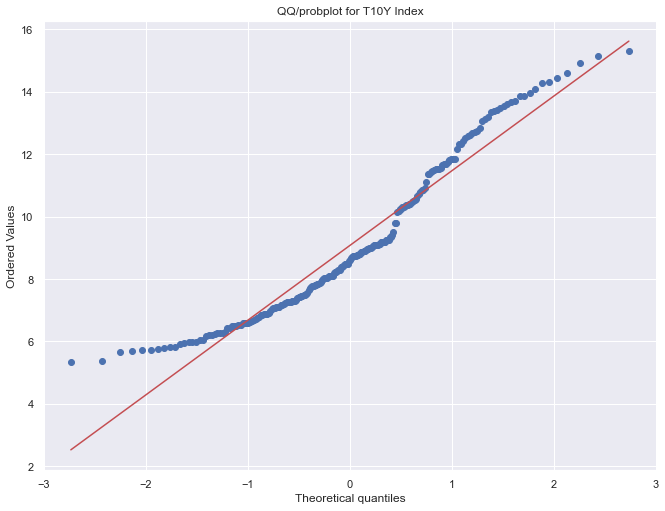

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(df['T10Y Index'], dist="norm", plot=pylab)
ax.set_title("QQ/probplot for T10Y Index")
pylab.show()

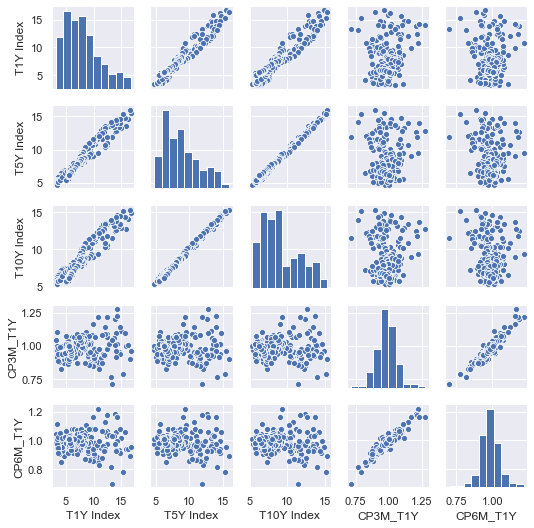

In [32]:
cols = ['T1Y Index','T5Y Index','T10Y Index','CP3M_T1Y', 'CP6M_T1Y']

sns.pairplot(df[cols], height=1.5)
plt.tight_layout()
plt.show()

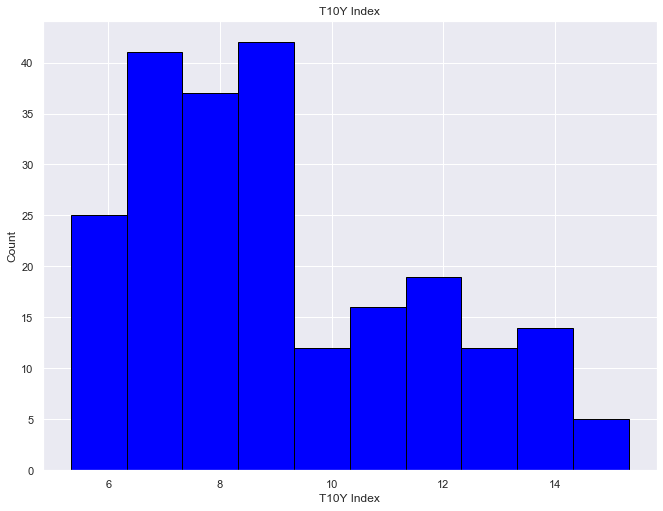

In [33]:
plt.hist(df['T10Y Index'],color='blue',ec='black')
plt.title('T10Y Index')
plt.xlabel('T10Y Index')
plt.ylabel('Count')
plt.show()

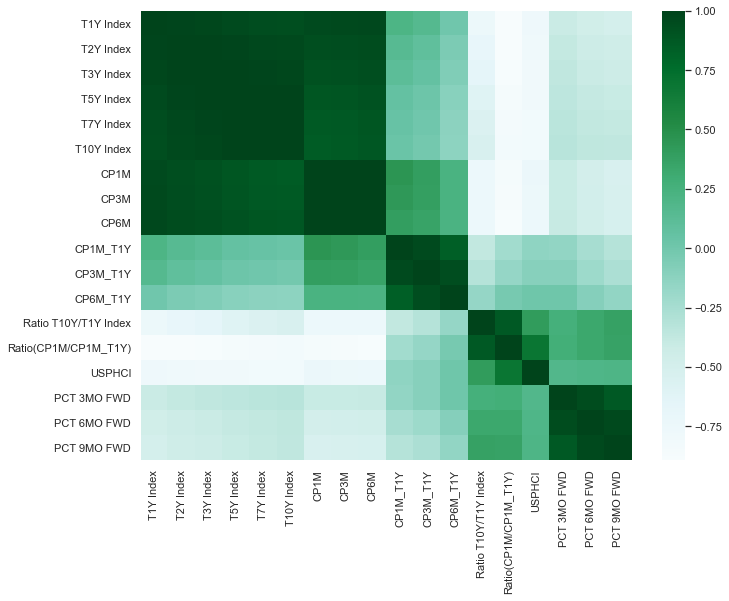

In [34]:
columnsNamesArr = df.columns.values
cm = np.corrcoef(df.values.T)
hm = sns.heatmap(cm,cmap='BuGn',cbar=True,xticklabels=columnsNamesArr,yticklabels=columnsNamesArr)
sns.set(rc={'figure.figsize':(11,8.27)})

In [55]:
sc = StandardScaler()
#splitting X from y(PCT 3MO FWD) and taking only the values
X = df.iloc[:, 0:-4]
y = df.iloc[: ,-3]

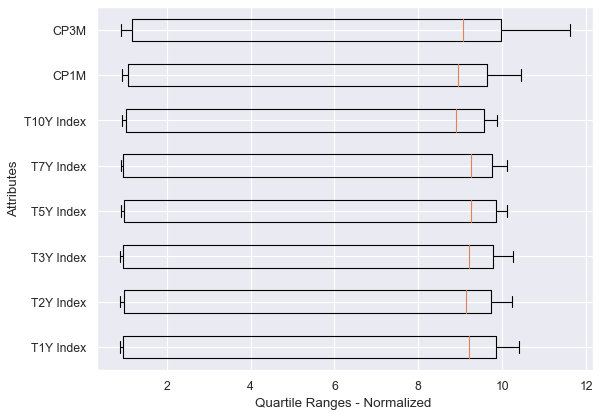

<Figure size 2880x7200 with 0 Axes>

In [39]:
columnsNamesArr = df.columns.values
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(X[0:8],labels=columnsNamesArr[0:8],vert=False)
plt.ylabel("Attributes")
plt.xlabel("Quartile Ranges - Normalized ")
plt.figure(figsize=(40,100))
plt.show()

In [57]:
sc = StandardScaler()
#splitting X from y(PCT 3MO FWD) and taking only the values
X = df.iloc[:, 0:-4].values
y = df.iloc[: ,-3].values
y = y.reshape(-1,1)
X_std = sc.fit_transform(X)
y_std = sc.fit_transform(y)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y_std, test_size=0.2, random_state=42)

In [36]:
#Linear Regression before PCA
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(lr.coef_[0])
print('Intercept: %.3f' % lr.intercept_)

[-0.00136476 -0.00113856 -0.00721111  0.00306839 -0.00987468  0.01634121
  0.01345634 -0.00940177 -0.00413787 -0.11485977  0.05811028  0.05916945
 -0.03121302  0.02441606]
Intercept: 0.035


In [68]:
#Scores for Linear Regression all components before PCA
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.635, test: 0.878
R^2 train: 0.386, test: -0.021


In [69]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
comp = pca.explained_variance_ratio_
print(comp)
print("Number of principal components: " + str(len(comp)))

[7.32562343e-01 2.05372662e-01 4.28395822e-02 1.00992531e-02
 7.34207872e-03 1.08744054e-03 2.94431701e-04 2.22075010e-04
 9.76655773e-05 4.82174057e-05 1.79472300e-05 1.03067423e-05
 4.88104720e-06 1.11561855e-06]
Number of principal components: 14


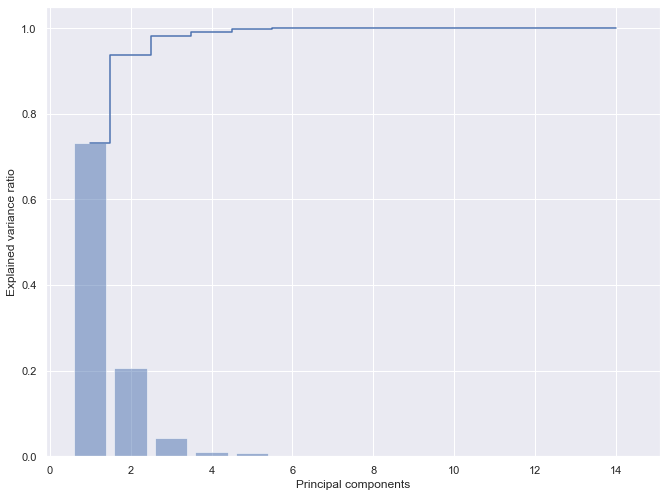

In [70]:
plt.bar(range(1, len(comp)+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, len(comp)+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [71]:
#taking only the top 3 components and running PCA again
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
comp = pca.explained_variance_ratio_
print(comp)
print("Number of principal components: " + str(len(comp)))

[0.73256234 0.20537266 0.04283958]
Number of principal components: 3


In [72]:
X_pca = pca.transform(X_std)
print("original shape: " + str(np.shape(X)))
print("transformed shape: " + str(np.shape(X_pca)))

original shape: (223, 14)
transformed shape: (223, 3)


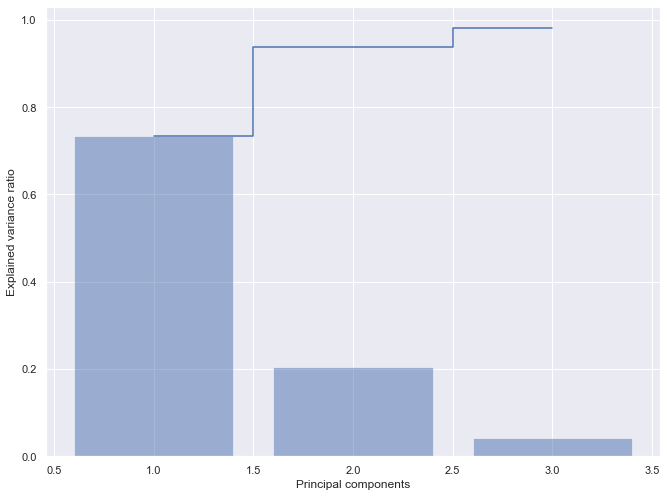

In [73]:
plt.bar(range(1, len(comp)+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, len(comp)+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [66]:
#Linear Regression after pca with 3 components
lr.fit(X_train_pca, y_train)
y_train_pred = lr.predict(X_train_pca)
y_test_pred = lr.predict(X_test_pca)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.860, test: 0.845
R^2 train: 0.169, test: 0.018


In [105]:
sc = StandardScaler()
#splitting X from y(PCT 6MO FWD) and taking only the values
X = df.iloc[:, 0:-4].values
y = df.iloc[: ,-2].values
y = y.reshape(-1,1)
X_std = sc.fit_transform(X)
y_std = sc.fit_transform(y)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y_std, test_size=0.2, random_state=42)

In [107]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [108]:
#Linear Regression after pca with 3 components
lr.fit(X_train_pca, y_train)
y_train_pred = lr.predict(X_train_pca)
y_test_pred = lr.predict(X_test_pca)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.812, test: 0.738
R^2 train: 0.223, test: 0.090


In [109]:
sc = StandardScaler()
#splitting X from y(PCT 9MO FWD) and taking only the values
X = df.iloc[:, 0:-4].values
y = df.iloc[: ,-1].values
y = y.reshape(-1,1)
X_std = sc.fit_transform(X)
y_std = sc.fit_transform(y)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y_std, test_size=0.2, random_state=42)

In [111]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [112]:
#Linear Regression after pca with 3 components
lr.fit(X_train_pca, y_train)
y_train_pred = lr.predict(X_train_pca)
y_test_pred = lr.predict(X_test_pca)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.777, test: 0.647
R^2 train: 0.260, test: 0.184


In [127]:
steps = [('scaler', StandardScaler()),('random_forest',RandomForestRegressor())]
pipeline = Pipeline(steps)
params_rf = {'random_forest__n_estimators': range(10,101,10)}
grid = GridSearchCV(pipeline,param_grid=params_rf)
grid.fit(X_train,np.ravel(y_train))
y_pred = grid.predict(X_test)
print("Accuracy: " + str(grid.score(X_test,np.ravel(y_test))))
print(grid.best_params_)

Accuracy: 0.4112542837486799
{'random_forest__n_estimators': 90}


In [128]:
result = cross_val_score(pipeline, X_train, np.ravel(y_train), cv=10)
print("In sample Scores: " + str(result))
print("Mean of Scores for In sample: " + str(np.mean(result)) + " , Std. Dev: " + str(np.std(result)))

In sample Scores: [ 0.84316481  0.84701225  0.41921791  0.82600903  0.85696931  0.41527737
  0.61251436  0.74510822  0.84094976 -1.13588941]
Mean of Scores for In sample: 0.5270333610436413 , Std. Dev: 0.578221638695838


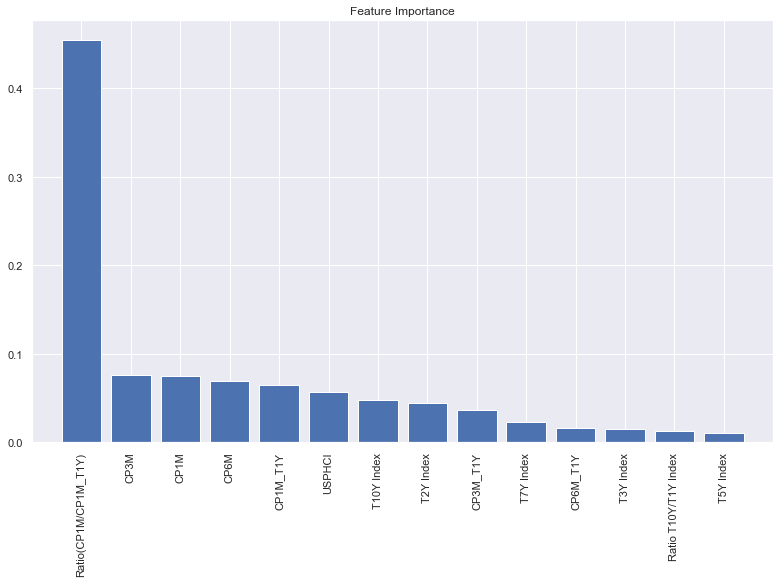

<Figure size 2880x5760 with 0 Axes>

In [132]:
forest = RandomForestRegressor(n_estimators=90)
forest.fit(X_train,np.ravel(y_train))
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

features = df.columns[1:-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           features[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.figure(figsize=(40,80))
plt.show()
